# **California housing price prediction**


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sklearn as sklearn
from sklearn import datasets
from pandas.plotting import scatter_matrix

In [ ]:
# X, Y = sklearn.datasets.fetch_california_housing(return_X_y=True)
dataset = sklearn.datasets.fetch_california_housing()
X, y = dataset.data, dataset.target

print('shape of attributes', X.shape)
print('shape of target', y.shape)

shape of attributes (20640, 8)
shape of target (20640,)


In [ ]:
data=pd.DataFrame(X,columns = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms',
                               'Population', 'AveOccupancy', 'Latitude', 'Longitude'])
data

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccupancy,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [ ]:
data.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccupancy,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


# Visualization of the data

---



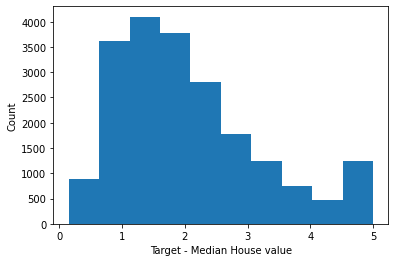

In [ ]:
plt.hist(y)
plt.xlabel('Target - Median House value')
plt.ylabel('Count')
plt.show()

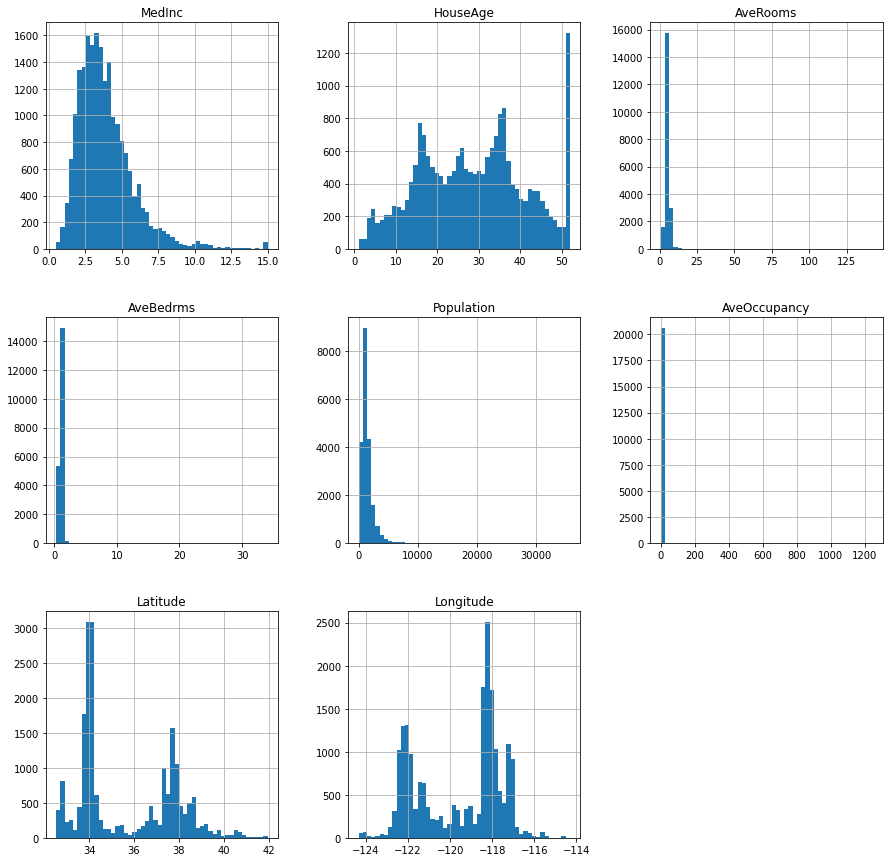

In [ ]:
data.hist(bins=50,figsize=(15,15))
# display histogram
plt.show()

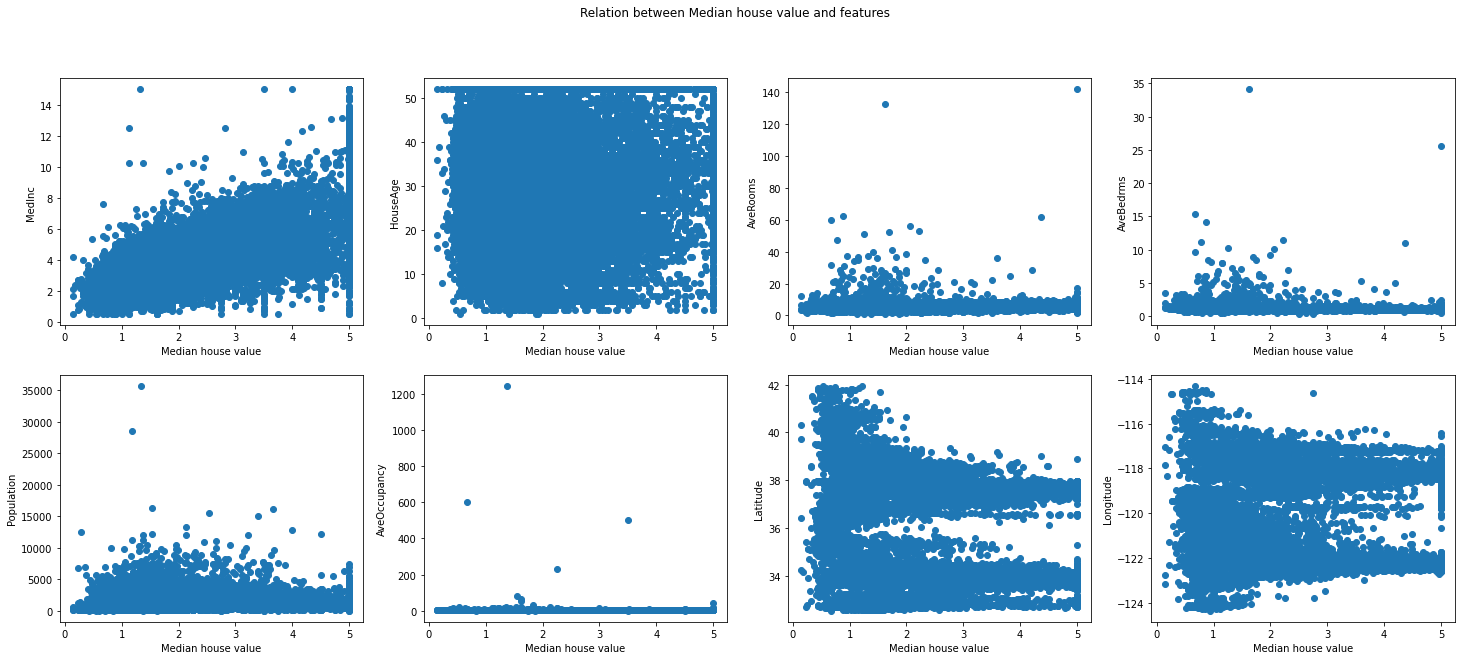

In [ ]:
i=1
plt.figure(figsize=(25,10))

for colname in data:
  plt.subplot(2,4,i)
  plt.scatter(y,data[colname].values)
  plt.xlabel('Median house value')
  plt.ylabel(colname)
  i+=1
plt.suptitle("Relation between Median house value and features")
plt.show()

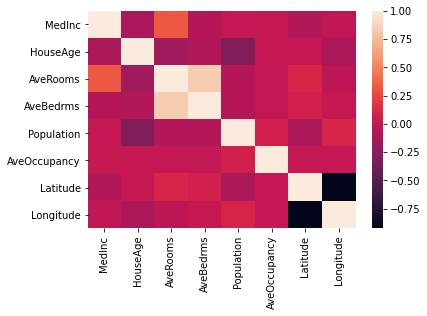

In [ ]:
plt.figure()
sns.heatmap(data.corr())

# Cleaning the data

---



1. Identification of features (columns in dataframe) that only have a single value.

In [ ]:
# get number of unique values for each column
counts = data.nunique()
print(counts)
# record columns to delete
to_del = [i for i,v in enumerate(counts) if v == 1]
print('Columns with single value', to_del)


MedInc          12928
HouseAge           52
AveRooms        19392
AveBedrms       14233
Population       3888
AveOccupancy    18841
Latitude          862
Longitude         844
dtype: int64
Columns with single value []


In [ ]:
# drop useless columns
data.drop(to_del, axis=1, inplace=True)
print(data.shape)

(20640, 8)


So in our dataset, no columns are dropped.

2. Identification of features with very few unique values.

In [ ]:
Name_List = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms',
                               'Population', 'AveOccupancy', 'Latitude', 'Longitude']

In [ ]:
from numpy import unique
col_todel=[]
for i in range(data.shape[1]):
  col=list(data[Name_List[i]])
  num = len(unique(col))
  percentage = float(num / data.shape[0]) * 100
  if percentage < 1:
      col_todel.append(i)
  print('%s, %d, %.1f%%' % (Name_List[i], num, percentage))
print('\n Column to delete', col_todel)

MedInc, 12928, 62.6%
HouseAge, 52, 0.3%
AveRooms, 19392, 94.0%
AveBedrms, 14233, 69.0%
Population, 3888, 18.8%
AveOccupancy, 18841, 91.3%
Latitude, 862, 4.2%
Longitude, 844, 4.1%

 Column to delete [1]


In [ ]:
data1=data.copy() # original features will be retained in data
# drop useless columns
for i in col_todel:
  data1.drop(Name_List[i], axis=1, inplace=True)
print(data1.shape)

(20640, 7)


3. Identification of rows that contain duplicate observations.

In [ ]:
# delete duplicate rows
data1.drop_duplicates(inplace=True)
print(data1.shape)

(20640, 7)


Since there are no duplicate rows, the shape is same.

# Create Train and Test data

---



In [ ]:
import sklearn
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data1, y, test_size=0.2, random_state=1)

In [ ]:
print('Shape of training data',X_train.shape)
print('Shape of training labels',y_train.shape)
print('Shape of testing data',X_test.shape)
print('Shape of testing labels',y_test.shape)

Shape of training data (16512, 7)
Shape of training labels (16512,)
Shape of testing data (4128, 7)
Shape of testing labels (4128,)


# **Linear Regression**

In [ ]:
# import model
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn import metrics

In [ ]:
from sklearn.preprocessing import MinMaxScaler, MaxAbsScaler, StandardScaler, RobustScaler, PolynomialFeatures
# from sklearn.preprocessing import QuantileTransformer, PowerTransformer

MSE =  0.5380990250708308


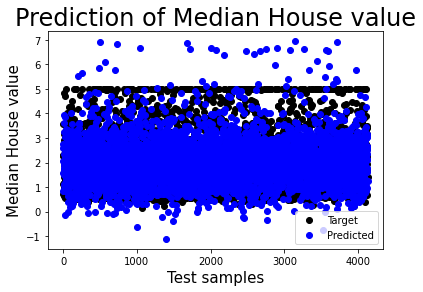

Score: 0.60 %


In [ ]:
linear_regression = LinearRegression()
mmscaler = MinMaxScaler()
X_train_norm = mmscaler.fit_transform(X_train)
X_test_norm = mmscaler.transform(X_test)

linear_regression.fit(X_train_norm, y_train)
y_pred = linear_regression.predict(X_test_norm)
mse = metrics.mean_squared_error(y_test, y_pred)
print('MSE = ', mse)
# Plot outputs
x_range=range(X_test.shape[0])
plt.scatter(x_range, y_test,  color='black')
plt.scatter(x_range, y_pred, color='blue')
plt.title('Prediction of Median House value', size=24)
plt.xlabel('Test samples', size=15)
plt.ylabel('Median House value',size=15)
plt.legend(labels=['Target', 'Predicted'])
plt.show()



# Evaluate the models using pipeline and crossvalidation
linear_regression1 = LinearRegression()
pipe_1 = Pipeline([('scaler', MinMaxScaler()),
                         ("regression", linear_regression1)])
pipe_1.fit(X_train,y_train)
scores = cross_val_score(linear_regression1, X_train, y_train,cv=10)
print("Score: {:.2f} %".format(scores.mean()))

# **PolynomialFeatures**

In [ ]:
poly_features = PolynomialFeatures(degree=2, include_bias=False)
mmscaler = MinMaxScaler()
X_trainpoly = poly_features.fit_transform(X_train)
X_testpoly = poly_features.fit_transform(X_test)

X_train_norm = mmscaler.fit_transform(X_trainpoly)
X_test_norm = mmscaler.transform(X_testpoly)
print(X_train_norm[0].shape)

(35,)


In [ ]:
print(X_trainpoly[0].shape)

(35,)


MSE =  0.47799573854496114


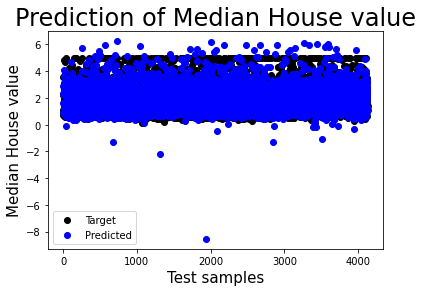

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(X_trainpoly, y_train)
y_pred = lin_reg.predict(X_testpoly)
mse = metrics.mean_squared_error(y_test, y_pred)
print('MSE = ', mse)
# Plot outputs
x_range=range(X_test.shape[0])
plt.scatter(x_range, y_test,  color='black')
plt.scatter(x_range, y_pred, color='blue')
plt.title('Prediction of Median House value', size=24)
plt.xlabel('Test samples', size=15)
plt.ylabel('Median House value',size=15)
plt.legend(labels=['Target', 'Predicted'])
plt.show()

(119,)
MSE =  1.551614116199306


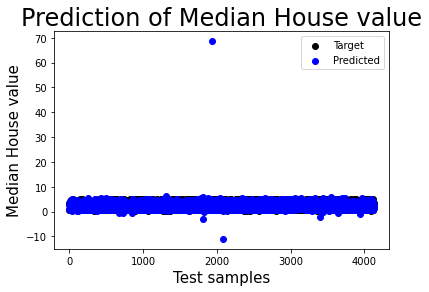

In [ ]:
poly_features = PolynomialFeatures(degree=3, include_bias=False)
mmscaler = MinMaxScaler()
X_trainpoly = poly_features.fit_transform(X_train)
X_testpoly = poly_features.fit_transform(X_test)

X_train_norm = mmscaler.fit_transform(X_trainpoly)
X_test_norm = mmscaler.transform(X_testpoly)

print(X_trainpoly[0].shape)
lin_reg = LinearRegression()
lin_reg.fit(X_trainpoly, y_train)
y_pred = lin_reg.predict(X_testpoly)
mse = metrics.mean_squared_error(y_test, y_pred)
print('MSE = ', mse)

# Plot outputs
x_range=range(X_test.shape[0])
plt.scatter(x_range, y_test,  color='black')
plt.scatter(x_range, y_pred, color='blue')
plt.title('Prediction of Median House value', size=24)
plt.xlabel('Test samples', size=15)
plt.ylabel('Median House value',size=15)
plt.legend(labels=['Target', 'Predicted'])
plt.show()

# **Learning Curves**

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
  scaler = StandardScaler()
  X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
  X_train_norm = scaler.fit_transform(X_train)
  X_val_norm = scaler.transform(X_val)
  train_errors, val_errors = [], []
  for m in range(1, len(X_train_norm),100):
    model.fit(X_train_norm[:m], y_train[:m])
    y_train_predict = model.predict(X_train_norm[:m])
    y_val_predict = model.predict(X_val_norm)
    train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
    val_errors.append(mean_squared_error(y_val, y_val_predict))
  plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
  plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
  plt.xlabel('Train set size')
  plt.ylabel('RMSE')
  plt.legend()
  print('Train Erros', train_errors)

Train Erros [0.0, 0.5720641009815183, 0.5210414255245593, 0.4580422041347827, 0.448991966710299, 0.41564446353961665, 0.44152093150957, 0.4494738201283848, 0.47939565857874444, 0.46759940259606564, 0.482710686337269, 0.476352846307865, 0.47099437283125506, 0.47056604032197685, 0.4729061319061219, 0.47484209060606175, 0.48087900185252014, 0.4867967952076835, 0.48592663348190623, 0.47786991856838756, 0.4807442321662672, 0.48980880388566506, 0.5004202727186624, 0.5003959158356285, 0.5014245096308202, 0.5016309541913618, 0.5085193994456944, 0.5085308764568781, 0.5146461184635099, 0.5475134419899953, 0.5448548903697734, 0.5366534590614851, 0.5318604518807768, 0.535300454443449, 0.5335090767320525, 0.5360166742447557, 0.532333334977659, 0.5456118592558323, 0.5438772328702284, 0.5424765316385356, 0.5385960730795426, 0.5400442950620641, 0.5384915279960556, 0.5378096258008573, 0.5351116805482299, 0.5358097213140899, 0.5389482558344442, 0.540665744363019, 0.5436660181413606, 0.5491533077607269, 

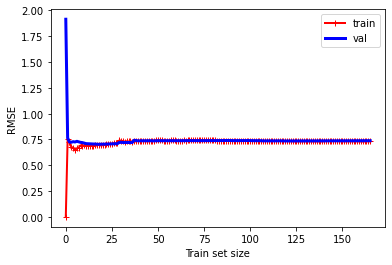

In [ ]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg,data1,y)

Train Erros [0.0, 0.1627480279475513, 0.32180649770531555, 0.34703969236793897, 0.3401490958828594, 0.340881032752582, 0.3672482288677757, 0.38991206915934346, 0.41650302110995924, 0.4185023578640957, 0.4378842503486606, 0.43178867598111365, 0.43861706848415977, 0.44181398347382406, 0.45302012064411123, 0.4454721754085452, 0.43906956930032054, 0.443201411075674, 0.4512815776695851, 0.44638324636059673, 0.4491210954152178, 0.44739425286907625, 0.4470754076947074, 0.44442586559739594, 0.452332532068929, 0.44723097571279957, 0.44924306143734305, 0.45250222214814884, 0.45023111842519553, 0.4524367795515911, 0.455170607319753, 0.4522578332922391, 0.4462650605261001, 0.4490984679279939, 0.4489938551950167, 0.44401025094910407, 0.44133967241607486, 0.43996614926457905, 0.4518545038619841, 0.4507933810361759, 0.4511342330923692, 0.4494833360621825, 0.44854823600803795, 0.4443999594343165, 0.4451538717613575, 0.4491792232902958, 0.45210656104552754, 0.45507572017313397, 0.45005079468293374, 0.4

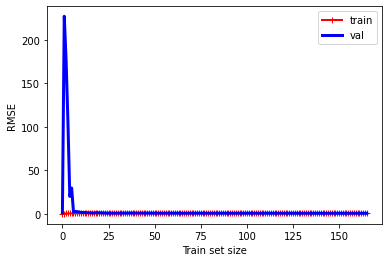

In [ ]:
from sklearn.pipeline import Pipeline
polynomial_regression = Pipeline([("poly_features", PolynomialFeatures(degree=2, include_bias=False)),
                                  ("lin_reg", LinearRegression()),])
plot_learning_curves(polynomial_regression,data1, y)

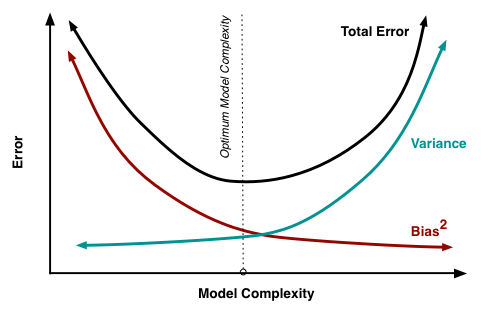

# **Regularized Linear Models**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

ridge = Ridge()
scaler = StandardScaler()
X_train_norm = scaler.fit_transform(X_train)
X_test_norm = scaler.transform(X_test)

parameters = {"alpha":[1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5, 10, 20]}
ridge_regression = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=5)
ridge_regression.fit(X_train_norm, y_train)

print('Best parameter', ridge_regression.best_params_)
print('Best Score',-ridge_regression.best_score_)

pred_test_rr= ridge_regression.predict(X_test_norm)
print('MSE for test prediction', mean_squared_error(y_test,pred_test_rr))


Best parameter {'alpha': 20}
Best Score 0.5397676233324156
MSE for test prediction 0.5378202207225878


In [ ]:
from sklearn.linear_model import Lasso
lasso = Lasso()

parameters = {"alpha":[1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5, 10, 20]}
lasso_regression = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)
lasso_regression.fit(X_train_norm, y_train)

print('Best parameter', lasso_regression.best_params_)
print('Best Score', -lasso_regression.best_score_)

pred_test_rr= lasso_regression.predict(X_test_norm)
print('MSE for test prediction', mean_squared_error(y_test,pred_test_rr))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 128.696209135961, tolerance: 1.7352830983432534
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 107.24682392223167, tolerance: 1.7735429123237387
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 122.7366596965876, tolerance: 1.7761208564353166
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.8741763

Best parameter {'alpha': 0.001}
Best Score 0.5396701741820324
MSE for test prediction 0.5379767869560712


In [ ]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(l1_ratio=0.5) # l1_ratio corresponds to mix ratio 'r'

parameters = {"alpha":[1e-4, 1e-3, 1e-2, 1e-1, 5, 10, 20]}
elastic_net_regression = GridSearchCV(elastic_net, parameters, scoring='neg_mean_squared_error', cv=5)
elastic_net_regression.fit(X_train_norm, y_train)

print('Best parameter', elastic_net_regression.best_params_)
print('Best Score', -elastic_net_regression.best_score_)

pred_test_rr= elastic_net_regression.predict(X_test_norm)
print('MSE for test prediction', mean_squared_error(y_test,pred_test_rr))

Best parameter {'alpha': 0.001}
Best Score 0.5397225835636716
MSE for test prediction 0.537915216904665
